# Imports

In [1]:
from math import pi, sqrt, cos, sin, asin, radians, atan2, degrees
import math
from random import random, gauss
import matplotlib.pyplot as plt
import numpy as np

# Setting up the Environment

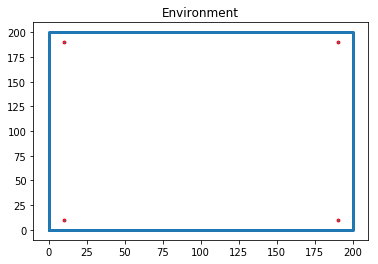

In [2]:
landmarks  = [[10, 10], [190, 190], [10, 190], [190, 10]]
world_size = 200
def drawEnv():
    x_landmark = [10, 190, 10, 190]
    y_landmark = [10, 190, 190, 10]
    # Draw point based on above x, y axis values.
    plt.scatter(x_landmark, y_landmark, s=8, edgecolors="red")
    x_bounds = [0, 200, 200, 0, 0]
    # List to hold y values.
    y_bounds = [0, 0, 200, 200, 0]
    # Plot the environment bound
    plt.plot(x_bounds, y_bounds, linewidth=3)
    plt.title("Environment")
drawEnv()
plt.show()

# Initializing the Robot

In [3]:
MAX_STEERING_ANGLE = pi / 4 # r

def set_noise(bearing, steering, distance):
    return float(bearing), float(steering), float(distance)

def set_pos(new_x, new_y, new_orientation):
    if new_x < 0 or new_x >= world_size:
        raise ValueError('X coordinate out of bound')
    if new_y < 0 or new_y >= world_size:
        raise ValueError('Y coordinate out of bound')
    if new_orientation < 0 or new_orientation >= 2 * pi:
        raise ValueError('Orientation must be in [0..2pi]')
    return float(new_x), float(new_y), float(new_orientation)

BEARING_NOISE_VAR, STEERING_NOISE_VAR, DISTANCE_NOISE_VAR = set_noise(0.1, 0.1, 5)
# TODO: Fix initialisation
def init_robot():
    x = random() * world_size
    y = random() * world_size
    robot = {
                "front_x": x,
                "front_y": y,
                "orientation": random() * world_size,
                "back_x": random() * world_size,
                "back_y": random() * world_size,
            }

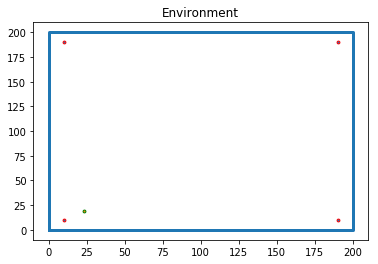

In [4]:
drawEnv()
plt.scatter(robot['front_x'], robot['front_y'], s=8, edgecolors="green")
plt.show()

# Sense Function

In [5]:
def getAngleDegrees(fromX,fromY,toX,toY):
    deltaX = fromX - toX
    deltaY = fromY - toY
    return atan2(deltaY, deltaX)

x2 = []
y2 = []

def sense(rob):
    Z = []
    for landmark in landmarks:
        z = getAngleDegrees(rob['front_x'], rob['front_y'], landmark[0], landmark[1])
        Z.append(z)
        x2.append(rob['front_x'] + 400 * -cos(z))
        y2.append(rob['front_y'] + 400 * -sin(z))

    return Z

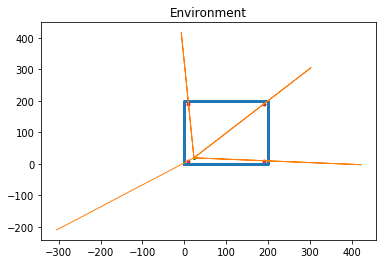

In [6]:
s = sense(robot)
# draw env
drawEnv()
# draw bot
plt.scatter(robot['front_x'], robot['front_y'], s=4, edgecolors="green")

line_x = []
for x in x2:
    line_x.append(x)
    line_x.append(robot['front_x'])

line_y = []
for y in y2:
    line_y.append(y)
    line_y.append(robot['front_y'])

plt.plot(line_x, line_y, linewidth=1)
plt.show()

fix sense to include gaussian

In [7]:
def sense(rob):
    Z = []
    for landmark in landmarks:
        z = getAngleDegrees(rob['front_x'], rob['front_y'], landmark[0], landmark[1])
        z += random.gauss(0, BEARING_NOISE_VAR)
        Z.append(z)

    return Z

# Move Function

# Particle Filter